# Albin Åberg Dahlberg
Exploration

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt

from utils.data import load_tof, Phi
from utils.plot import plot_predictions

from models.mixture import MixtureLinearRegression
from image_processing_filter import process

# Read data file

### Do feature engineering and train model on the dataset

In [2]:
FILE_PATH = '../data/tof_erda/raw/I_36MeV_SH2-1_TiN-ref.lst'
# X is E
# y is ToF
# phi is feature for linear relationship between phi, y
# When training, use phi, when plotting use X
X, y, phi = load_tof(FILE_PATH)
X, y = process(X,y.flatten(), noise_sensitivity=0.8)
phi = Phi(X)
y = y.reshape(-1,1)

### Training the model and predicting ToF. Plotting the 95% probability area 

100%|██████████| 2/2 [00:00<00:00,  3.76it/s]


Stopped after 2 iterations.


100%|██████████| 3/3 [00:00<00:00, 30.44it/s]


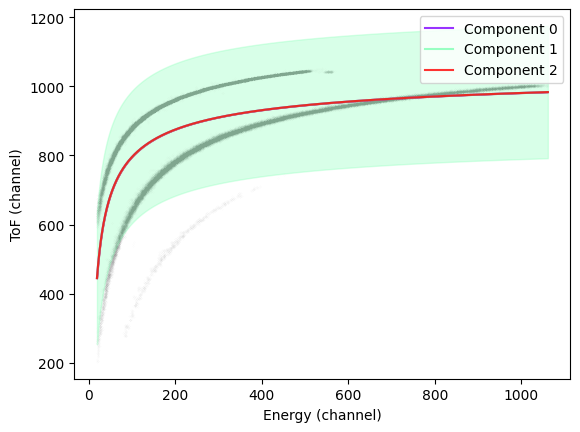

{'K': 3,
 'beta': array([2.63036176e-11, 9.17604678e+03, 2.63036176e-11]),
 'W': array([[ 1066.80606334,  1066.80632683,  1066.80606334],
        [-2711.94692335, -2711.94933921, -2711.94692335]]),
 'pi': array([3.04936486e-06, 9.99993901e-01, 3.04936486e-06]),
 'gamma_nk': array([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]])}

In [3]:
mlr = MixtureLinearRegression(K=3, beta=1/y.var(), iterations=2, bias=True)
mlr.train(phi, y)
y_pred = mlr.predict(phi)
plot_predictions(X, y, y_pred, mlr, size=0.01, fill=True)
mlr.params()

### How to step over each iteration and see training process

100%|██████████| 3/3 [00:00<00:00, 25.95it/s]


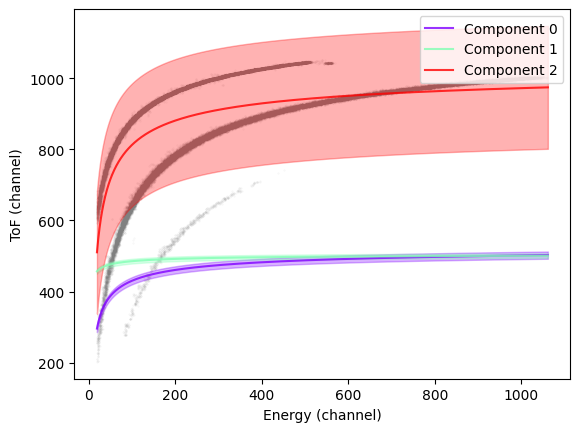

100%|██████████| 3/3 [00:00<00:00, 39.37it/s]


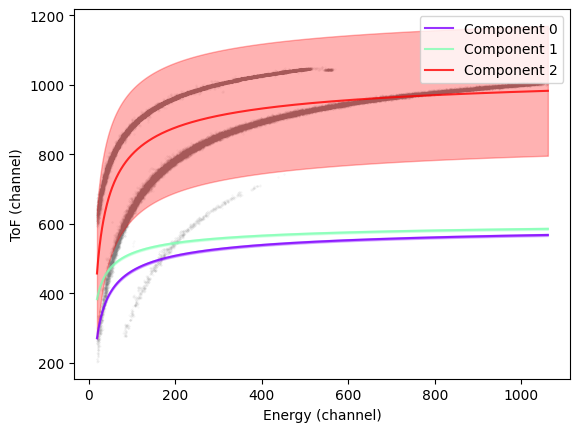

100%|██████████| 3/3 [00:00<00:00, 27.19it/s]


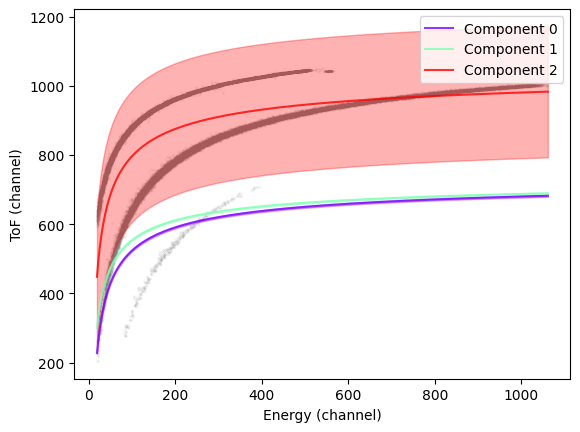

100%|██████████| 3/3 [00:00<00:00, 12.10it/s]


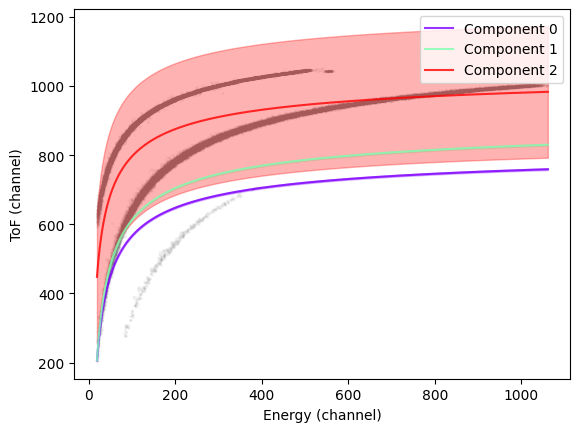

100%|██████████| 3/3 [00:00<00:00, 27.34it/s]


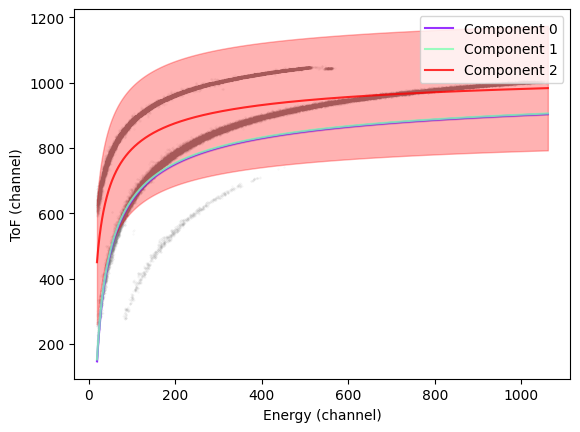

100%|██████████| 3/3 [00:00<00:00, 35.30it/s]


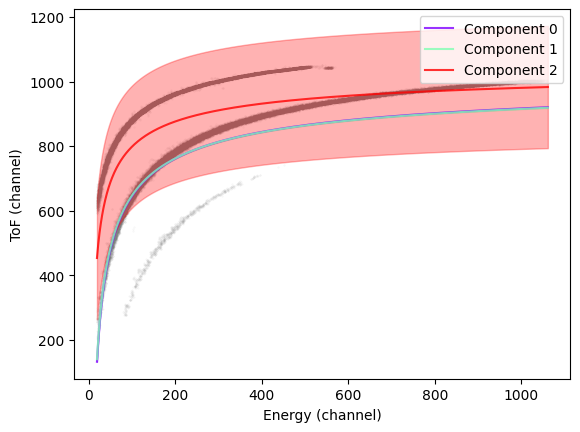

100%|██████████| 3/3 [00:00<00:00, 11.20it/s]


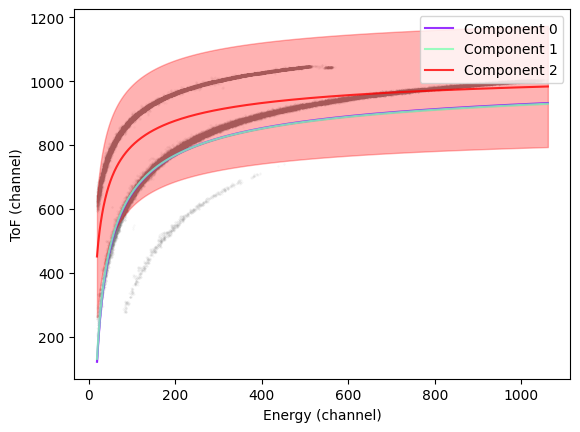

100%|██████████| 3/3 [00:00<00:00, 32.02it/s]


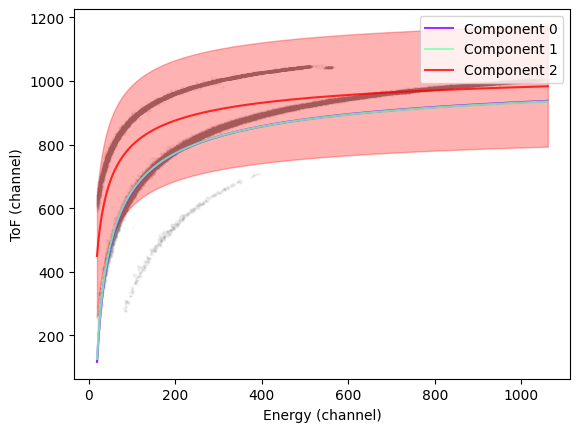

100%|██████████| 3/3 [00:00<00:00, 32.82it/s]


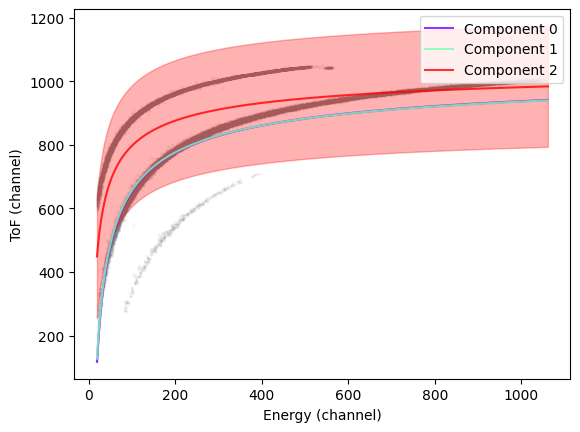

100%|██████████| 3/3 [00:00<00:00, 35.85it/s]


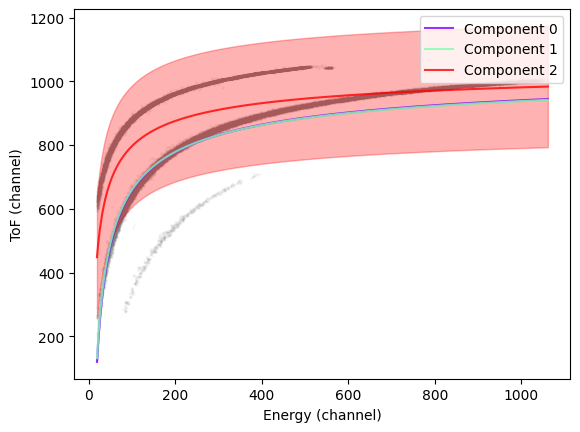

{'K': 3,
 'beta': array([3.07849652e-02, 2.73295825e-02, 9.06226525e+03]),
 'W': array([[ 1072.06430804,  1067.35644185,  1066.47771682],
        [-4151.03008125, -4080.0790348 , -2695.60748563]]),
 'pi': array([0.00316624, 0.00354959, 0.99328417]),
 'gamma_nk': array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]])}

In [5]:
RANDOM_STATE = None
mlr = MixtureLinearRegression(K=3, beta=1/y.var(), iterations=0, lam=1e-4, bias=True, random_state=RANDOM_STATE)
iterations = 10
for i in range(iterations):
    mlr.step(phi, y)
    y_pred = mlr.predict(phi)
    plot_predictions(X, y, y_pred, mlr, size=0.1, fill=True)
mlr.params()

# Testing mixed linreg

### Define data
Linear data, with an interval where the derivative and spread increases

In [5]:
line = np.linspace(start=0, stop=99, num=100, dtype=int)
y_data = np.empty(shape=(len(line)))
for x in line:
    n = x + np.random.normal(loc=0, scale=5)
    if x > 25 and x < 75:
        n = 10*x + np.random.normal(loc=0, scale=50) + 200
    y_data[x] = n

(100,)
(100,)


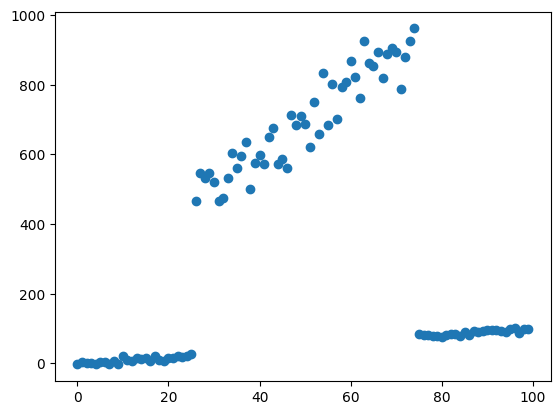

In [6]:
print(line.shape)
print(y_data.shape)
plt.scatter(line, y_data)

#### We'd expect the mixture of linear regression to capture both lines. If bias, then perfectly, if no bias, then two lines where one goes through the two lower, and one which goes through the upper

# TODO: If we want plots with this, then fix!

## Mixture with bias

In [7]:
x = Phi(line, [1])
y_data = y_data.reshape((-1, 1))
m = MixtureLinearRegression(K=2, beta=10, iterations=10, bias=True, lam=1e-7, epsilon=1e-2)
m.train(x, y_data)
y_pred = m.predict(x)
plot_predictions(x[:,0], y_data, y_pred, m, size=100, fill=True)
m.params()

NameError: name 'Phi' is not defined

## Mixture without bias

100%|██████████| 2/2 [00:00<00:00, 999.60it/s]


Stopped after 2 iterations.


100%|██████████| 2/2 [00:00<00:00, 54.05it/s]


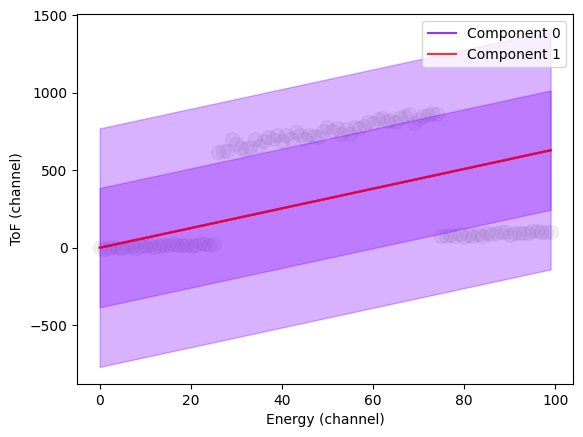

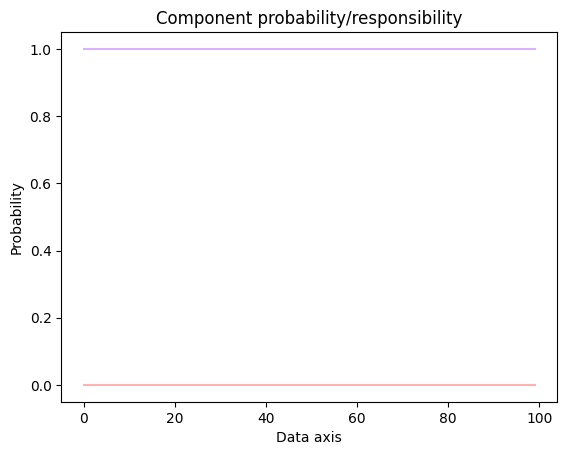

{'K': 2,
 'beta': array([1.48213448e+05, 4.51787179e-44]),
 'W': array([[6.36031612, 6.36031612]]),
 'pi': array([1.00000000e+00, 2.29318245e-45]),
 'gamma_nk': array([[1.00000000e+00, 2.29318245e-43],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 0.00000000e+00],


In [ ]:
m = MixtureLinearRegression(K=2, beta=10, iterations=2, bias=False, eta=0, lam=1e-7, epsilon=0)
x = Phi(line, [1])
y_data = y_data.reshape((-1, 1))
m.train(x, y_data)
y_pred = m.predict(x)
plot_predictions(x[:,0], y_data, y_pred, m, size=100, fill=True)
plot_responsibilities(x[:,0], m)
m.params()

### Works as expected. Now we gotta find good features for ToF-ERDA and optimize the class (the N x N matrices are not fast). Regularization terms and other hyperparameters can be optimized